# LSTM for Stock Market Prediction - An Example

In [13]:
import numpy as np 
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM,Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# to set data path
dataPath = 'https://raw.githubusercontent.com/stillxyxon/py_ml_analysis/master/'
# dataPath = 'C:/YONG/m1710/myPydata/'

# https://www.kaggle.com/amarpreetsingh/stock-prediction-lstm-using-keras/notebook 

### Data Loading 

In [14]:
# S&P 500 Stock Data
# 
# data = pd.read_csv(dataPath + 'all_stocks_5yr.csv')
# data = data[data.Name.isin(['GOOGL', 'AMZN','AAPL','FDX','GM','HPE','MSFT','WMT','MSFT','ZTS'])]
# data.to_csv(dataPath + 'select_stocks_5yr.csv')
data = pd.read_csv(dataPath + 'select_stocks_5yr.csv')

print(data.columns)
print('Names :: ', data.Name.unique()[:20])
print(data.tail())

cl = data[data['Name']=='AMZN'].Close

print(cl.shape)
print(cl.head())

Index(['Unnamed: 0', 'Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Name'], dtype='object')
Names ::  ['GOOGL' 'AMZN' 'AAPL' 'FDX' 'GM' 'HPE' 'MSFT' 'WMT' 'ZTS']
       Unnamed: 0        Date   Open   High    Low  Close     Volume Name
10400      606796  2017-08-07  62.12  62.34  61.25  61.83  4208287.0  ZTS
10401      606797  2017-08-08  60.49  61.00  59.50  60.00  4663668.0  ZTS
10402      606798  2017-08-09  59.95  60.87  59.76  60.81  4017297.0  ZTS
10403      606799  2017-08-10  60.87  61.37  59.71  59.74  2690725.0  ZTS
10404      606800  2017-08-11  60.05  60.22  59.64  59.73  2285863.0  ZTS
(1258,)
1258    232.44
1259    233.19
1260    237.42
1261    241.55
1262    241.17
Name: Close, dtype: float64


### Data Preparation

In [15]:
scl = MinMaxScaler()

#Scale the data
cl = np.array(cl).reshape(cl.shape[0],1)
cl = scl.fit_transform(cl)
cl

array([[0.01422735],
       [0.01512857],
       [0.02021149],
       ...,
       [0.91493631],
       [0.88478731],
       [0.8980894 ]])

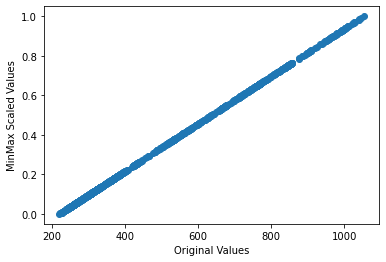

In [16]:
# What is MinMax Scaling?

plt.scatter(scl.inverse_transform(cl), cl)
plt.xlabel('Original Values')
plt.ylabel('MinMax Scaled Values')
plt.show()

In [17]:
#Create a function to process the data into 7 day look back slices

def processData(data,lb):
    X,Y = [],[]
    for i in range(len(data)-lb-1):
        X.append(data[i:(i+lb),0])
        Y.append(data[(i+lb),0])
    return np.array(X),np.array(Y)

X,y = processData(cl,7)
X_train,X_test = X[:int(X.shape[0]*0.80)],X[int(X.shape[0]*0.80):]
y_train,y_test = y[:int(y.shape[0]*0.80)],y[int(y.shape[0]*0.80):]

print('Train set :', X_train.shape[0], y_train.shape[0])
print('Test set :', X_test.shape[0], y_test.shape[0])

print('\nTraining Set : \n', X_train[:3])
# slides one day

Train set : 1000 1000
Test set : 250 250

Training Set : 
 [[0.01422735 0.01512857 0.02021149 0.02517424 0.02471762 0.02373228
  0.02265081]
 [0.01512857 0.02021149 0.02517424 0.02471762 0.02373228 0.02265081
  0.02703677]
 [0.02021149 0.02517424 0.02471762 0.02373228 0.02265081 0.02703677
  0.02475366]]


### Model Building

In [18]:
# Build the model
model = Sequential()
model.add(LSTM(256,input_shape=(7,1), recurrent_dropout=0.4))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

# Reshape data for (Sample,Timestep,Features) 
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))

import datetime
starttime = datetime.datetime.now()
# Fit model with history to check for overfitting
history = model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test),shuffle=False)
# history = model.fit(X_train,y_train,epochs=100)
# default batch size of Minibatch Gradient Descent in Keras == 32

endtime = datetime.datetime.now()
timetoFit = endtime - starttime
print(timetoFit)

Epoch 1/100
32/32 [==============================] - 2s 77ms/step - loss: 0.0031 - val_loss: 0.0099
Epoch 2/100
32/32 [==============================] - 1s 45ms/step - loss: 0.0015 - val_loss: 7.5775e-04
Epoch 3/100
32/32 [==============================] - 1s 43ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 4/100
32/32 [==============================] - 1s 43ms/step - loss: 8.4672e-04 - val_loss: 0.0085
Epoch 5/100
32/32 [==============================] - 1s 41ms/step - loss: 0.0014 - val_loss: 0.0052
Epoch 6/100
32/32 [==============================] - 1s 41ms/step - loss: 0.0015 - val_loss: 0.0093
Epoch 7/100
32/32 [==============================] - 1s 41ms/step - loss: 9.5479e-04 - val_loss: 0.0018
Epoch 8/100
32/32 [==============================] - 1s 41ms/step - loss: 9.6310e-04 - val_loss: 0.0038
Epoch 9/100
32/32 [==============================] - 1s 45ms/step - loss: 0.0015 - val_loss: 0.0032
Epoch 10/100
32/32 [==============================] - 1s 45ms/step - loss: 0.0017 - 

32/32 [==============================] - 1s 37ms/step - loss: 2.5775e-04 - val_loss: 0.0015
Epoch 79/100
32/32 [==============================] - 1s 36ms/step - loss: 2.2145e-04 - val_loss: 0.0014
Epoch 80/100
32/32 [==============================] - 1s 36ms/step - loss: 2.1645e-04 - val_loss: 0.0014
Epoch 81/100
32/32 [==============================] - 1s 38ms/step - loss: 2.2244e-04 - val_loss: 0.0015
Epoch 82/100
32/32 [==============================] - 1s 38ms/step - loss: 2.5432e-04 - val_loss: 0.0020
Epoch 83/100
32/32 [==============================] - 1s 37ms/step - loss: 2.9144e-04 - val_loss: 0.0020
Epoch 84/100
32/32 [==============================] - 1s 41ms/step - loss: 2.9433e-04 - val_loss: 0.0020
Epoch 85/100
32/32 [==============================] - 1s 40ms/step - loss: 2.9558e-04 - val_loss: 0.0021
Epoch 86/100
32/32 [==============================] - 1s 39ms/step - loss: 2.8491e-04 - val_loss: 0.0020
Epoch 87/100
32/32 [==============================] - 1s 41ms/step -

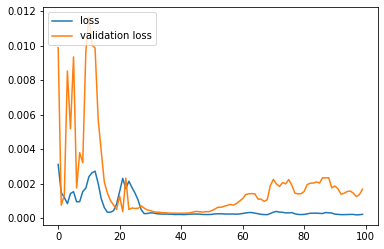

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'validation loss'], loc='upper left')
plt.show()

### Assessment of Model Generated Predictions

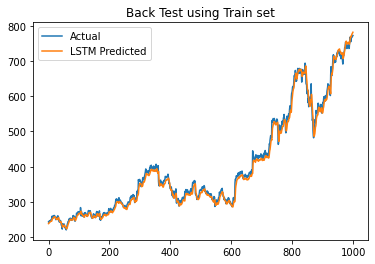

MAE :  0.19003685190877845


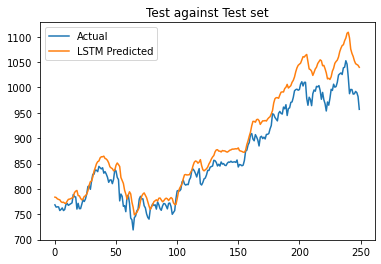

MAE :  0.1343964015331482


In [20]:
# 예측과 실제를 비교하는 챠트를 생성하는 함수
# 데이터셋을 변경하는 경우에도 재사용

def PredActPlot(x, y, title):
    plt.plot(scl.inverse_transform(y.reshape(-1,1)))
    Xt = model.predict(x)
    plt.plot(scl.inverse_transform(Xt))
    plt.legend(['Actual', 'LSTM Predicted'], loc='upper left')
    plt.title(title)
    plt.show()

    print('MAE : ' , abs(y - Xt).mean())
    
    
PredActPlot(X_train, y_train, 'Back Test using Train set')    

PredActPlot(X_test, y_test, 'Test against Test set')   

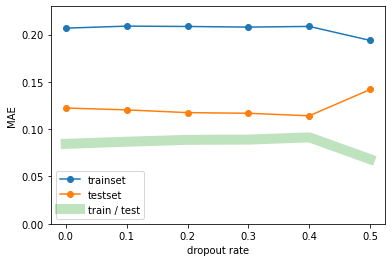

In [21]:
# [training back test]

# Plotting MAEs using plots
# dropout 조절에 따른 영향 시각화

# 
dropoutRate = [0, 0.1, 0.2, 0.3, 0.4, 0.5]
trainset_MAE = [0.2068037956466343, 0.20893011636696093, 0.20855772144070903, 
                0.20789989521961694, 0.2086194820712931, 0.19381915577409722]
testset_MAE = [0.1223689780640864, 0.1204013283316123, 0.11750664105373453,
              0.1168065766005788, 0.11416013395691078, 0.14196582961782586]

plt.plot(dropoutRate, trainset_MAE, 'o-')
plt.plot(dropoutRate, testset_MAE,'o-')
plt.plot(dropoutRate, np.array(trainset_MAE)/np.array(testset_MAE)*0.05,
        linewidth=10, alpha=0.3)
plt.xlabel('dropout rate')
plt.ylabel('MAE')
plt.legend(['trainset','testset', 'train / test'])
max_MAE = np.array(trainset_MAE + testset_MAE).max()
plt.ylim(0, max_MAE *1.1)
plt.show()

실험해본 것 중에서 dropout rate 0.4가 오차 최저라면 0.35, 0.45를 더 테스트해 본다면?

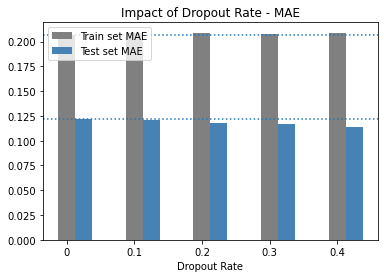

In [22]:
# dropout 조절에 따른 영향 시각화
# Plotting MAEs using multiple bar charts

data = [[0.2068037956466343, 0.20893011636696093, 0.20855772144070903, 
         0.20789989521961694, 0.2086194820712931],
        [0.1223689780640864, 0.1204013283316123, 0.11750664105373453, 
         0.1168065766005788, 0.11416013395691078]]

X = np.arange(5)
plt.bar(X + 0.00, data[0], width = 0.25, color='grey')
plt.bar(X + 0.25, data[1], width = 0.25, color='steelblue')
plt.legend(['Train set MAE', 'Test set MAE'], loc='upper left')
plt.axhline(data[0][0], linestyle=':')
plt.axhline(data[1][0], linestyle=':')
plt.title('Impact of Dropout Rate - MAE')
plt.xlabel('Dropout Rate')
plt.xticks(np.arange(5), ('0', '0.1', '0.2', '0.3', '0.4'))
plt.show()


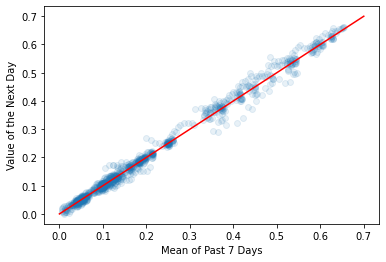

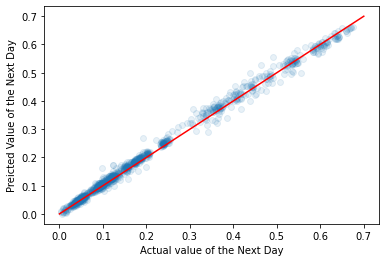

In [23]:
# a scatter plot of median of the past 7 days and the target?

plt.scatter(X_train.mean(axis=1), y_train, alpha=0.1)
plt.plot([0,0.7],[0,0.7], color='red')
plt.xlabel('Mean of Past 7 Days')
plt.ylabel('Value of the Next Day')
plt.show()

# Actutal vs. LSTM predicted?

Xt = model.predict(X_train)
plt.scatter(Xt, y_train, alpha=0.1)
plt.plot([0,0.7],[0,0.7], color='red')
plt.xlabel('Actual value of the Next Day')
plt.ylabel('Preicted Value of the Next Day')
plt.show()

In [24]:
print('MAEs \n============')
print('Model : ', abs(Xt- y_train).mean())
print('Last day : ', abs(X_train[:,0]- y_train).mean())

MAEs 
Model :  0.19003685190877845
Last day :  0.18844196541696714
